<a href="https://colab.research.google.com/github/cicada0521/Finance/blob/main/Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


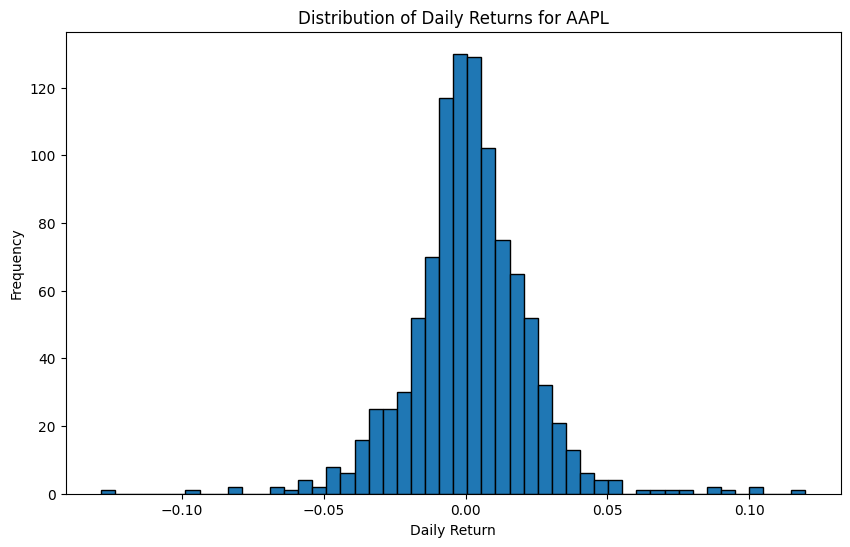

Mean daily return: 0.0012
Standard deviation of daily returns: 0.0211


In [ ]:
#1
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download historical stock price data (using Apple Inc. as an example)
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-12-31"

stock_data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

# Create a histogram to visualize the distribution of returns
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Daily_Return'].dropna(), bins=50, edgecolor='black')
plt.title(f'Distribution of Daily Returns for {ticker}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and standard deviation of returns
mean_return = stock_data['Daily_Return'].mean()
std_return = stock_data['Daily_Return'].std()

print(f"Mean daily return: {mean_return:.4f}")
print(f"Standard deviation of daily returns: {std_return:.4f}")

#Interpretation
# 1.The histogram shows the distribution of daily returns. A bell-shaped curve centered around zero would indicate normally distributed returns.
# 2.The mean daily return represents the average return you could expect on any given day.
# 3.The standard deviation of daily returns measures the volatility or risk associated with the stock.



[*********************100%***********************]  1 of 1 completed


R-squared score: 0.9065


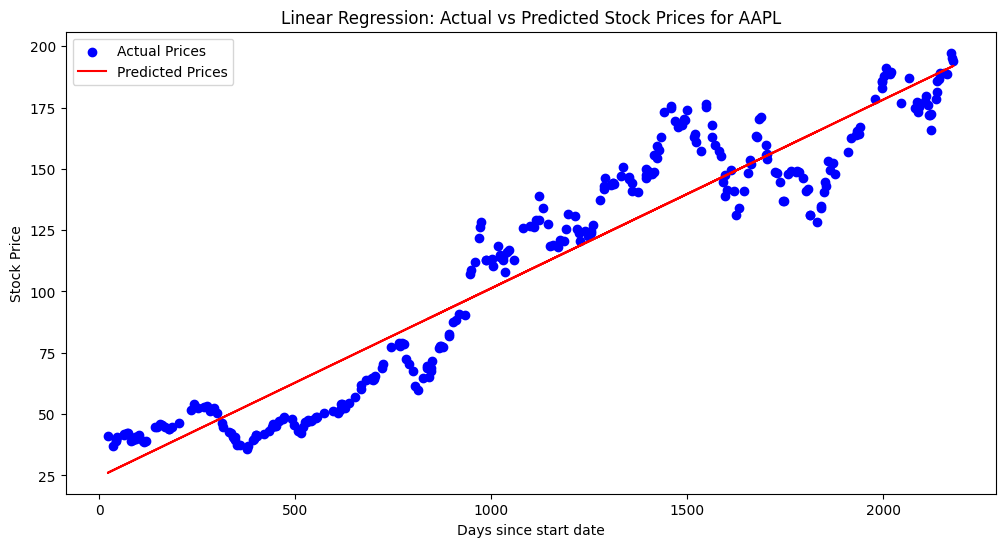


Predicted prices for the next 30 days:
Day 2188: $192.69
Day 2189: $192.76
Day 2190: $192.84
Day 2191: $192.92
Day 2192: $192.99
Day 2193: $193.07
Day 2194: $193.15
Day 2195: $193.22
Day 2196: $193.30
Day 2197: $193.38
Day 2198: $193.46
Day 2199: $193.53
Day 2200: $193.61
Day 2201: $193.69
Day 2202: $193.76
Day 2203: $193.84
Day 2204: $193.92
Day 2205: $193.99
Day 2206: $194.07
Day 2207: $194.15
Day 2208: $194.22
Day 2209: $194.30
Day 2210: $194.38
Day 2211: $194.45
Day 2212: $194.53
Day 2213: $194.61
Day 2214: $194.69
Day 2215: $194.76
Day 2216: $194.84
Day 2217: $194.92


In [ ]:
#2
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Download historical stock price data (using Apple Inc. as an example)
ticker = "AAPL"
start_date = "2018-01-01"
end_date = "2023-12-31"

stock_data = yf.download(ticker, start=start_date, end=end_date)

# Prepare the data
stock_data['Date'] = stock_data.index
stock_data['Date'] = (stock_data['Date'] - stock_data['Date'].min()).dt.days

X = stock_data[['Date']]
y = stock_data['Adj Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"R-squared score: {r2:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.title(f'Linear Regression: Actual vs Predicted Stock Prices for {ticker}')
plt.xlabel('Days since start date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Predict future prices (next 30 days)
last_date = stock_data['Date'].max()
future_dates = pd.DataFrame({'Date': range(last_date + 1, last_date + 31)})
future_prices = model.predict(future_dates)

print("\nPredicted prices for the next 30 days:")
for date, price in zip(future_dates['Date'], future_prices):
    print(f"Day {date}: ${price:.2f}")

#Interpretation
# 1.The R-squared score indicates how well the model fits the data. A score closer to 1 indicates a better fit.
# 2.The visualization helps to see how closely the predicted prices match the actual prices.
# 3.The predictions for the next 30 days should be taken with caution, as stock prices are influenced by many factors not accounted for in this simple model.

